# Multiple Linear Regression

## Task
perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

## Dataset Description: in EUROs


The dataset consists of the following variables:

Age: Age in years

KM: Accumulated Kilometers on odometer

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power

Automatic: Automatic ( (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters

Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax: 

Price: Offer Price in EUROs

In [129]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import root_mean_squared_error, r2_score

In [130]:
# read the dataset
tc = pd.read_csv('ToyotaCorolla - MLR.csv')

In [131]:
# checking number of rows and columns
tc.shape

(1436, 11)

In [132]:
# checking top 5 rows
tc.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [133]:
# checking last 5 rows
tc.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [134]:
# checking the missing values
tc.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [135]:
# there are no missing values

In [136]:
# checking for number of unique values in each column and any special symbols or wrong entered data
for i in tc.columns:
    print({i:tc[i].nunique()})
    print({i:tc[i].unique()})

{'Price': 236}
{'Price': array([13500, 13750, 13950, 14950, 12950, 16900, 18600, 21500, 20950,
       19950, 19600, 22500, 22000, 22750, 17950, 16750, 16950, 15950,
       16250, 17495, 15750, 15500, 14750, 19000, 15800, 21950, 20500,
       13250, 15250, 18950, 15999, 16500, 18750, 22250, 12995, 18450,
       16895, 14900, 17250, 15450, 16650, 17450, 16450, 18900, 18990,
       18500, 19450, 18800, 32500, 31000, 31275, 24950, 22950, 24990,
       17900, 19250, 16350, 21750, 15850, 23000, 19900, 23950, 24500,
       17200, 19500, 16868, 19750, 20750, 17650, 17795, 18245, 23750,
       18700, 21125,  6950,  9500, 11950,  7750,  4350,  4750, 11750,
       11900,  9950, 11495, 11250, 10500, 10450, 11500, 12500, 10950,
       11450, 11790, 12450, 11690, 12750, 11925, 12900, 11650, 10850,
        9940, 13450, 12495, 12000, 11480, 14990, 12850, 11700, 11895,
       13875, 12295, 13995,  9900, 11990, 10750, 11695, 11000, 12400,
       12200, 12695, 14350, 10250,  6500,  6400,  7000,  8900,  8

In [137]:
# there is no wrong input data

In [138]:
# checking the duplicates rows
tc.duplicated().sum()

1

In [139]:
# one duplicate row found have to drop that duplicate row

In [140]:
# dropping the duplicate rows
tc.drop_duplicates(inplace=True)

In [141]:
# reset the index and drop the existing index
tc.reset_index(drop=True,inplace=True)

In [142]:
# checking the dataframe
tc

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [143]:
# checking for number unique values in each column
print(tc.nunique())

Price         236
Age_08_04      77
KM           1263
Fuel_Type       3
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
dtype: int64


In [144]:
# Fuel_Type, Automatic, Doors, Cylinders and Gears have unique values very less compare to other columns let see that values

In [145]:
# checking the values count in each column where categories less than 5
for i in tc.columns:
    if tc[i].nunique() < 5:
        print(tc[i].value_counts(),'\n')

Fuel_Type
Petrol    1264
Diesel     154
CNG         17
Name: count, dtype: int64 

Automatic
0    1355
1      80
Name: count, dtype: int64 

Doors
5    673
3    622
4    138
2      2
Name: count, dtype: int64 

Cylinders
4    1435
Name: count, dtype: int64 

Gears
5    1389
6      43
3       2
4       1
Name: count, dtype: int64 



In [146]:
# summary statistics
tc.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


In [147]:
# high variance in Price and KM because standard deviation is high
# there are outliers in KM, HP, ccand Weight because max values have far from 3rd quartile and min value is far from 1st quartile
# most of the vehicle drove less thank 100K km becuase mean value is around 68K km and 3rd quartile is 87K km
# most of the vehicles are not automatic because mean value close to zero.
# cylinders standard deviation is zero we will drop because no information we will get

In [148]:
# checking the dataypes
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age_08_04  1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   Fuel_Type  1435 non-null   object
 4   HP         1435 non-null   int64 
 5   Automatic  1435 non-null   int64 
 6   cc         1435 non-null   int64 
 7   Doors      1435 non-null   int64 
 8   Cylinders  1435 non-null   int64 
 9   Gears      1435 non-null   int64 
 10  Weight     1435 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.4+ KB


In [149]:
# Fuel_Type is categorical and remaining 10 columns are integer

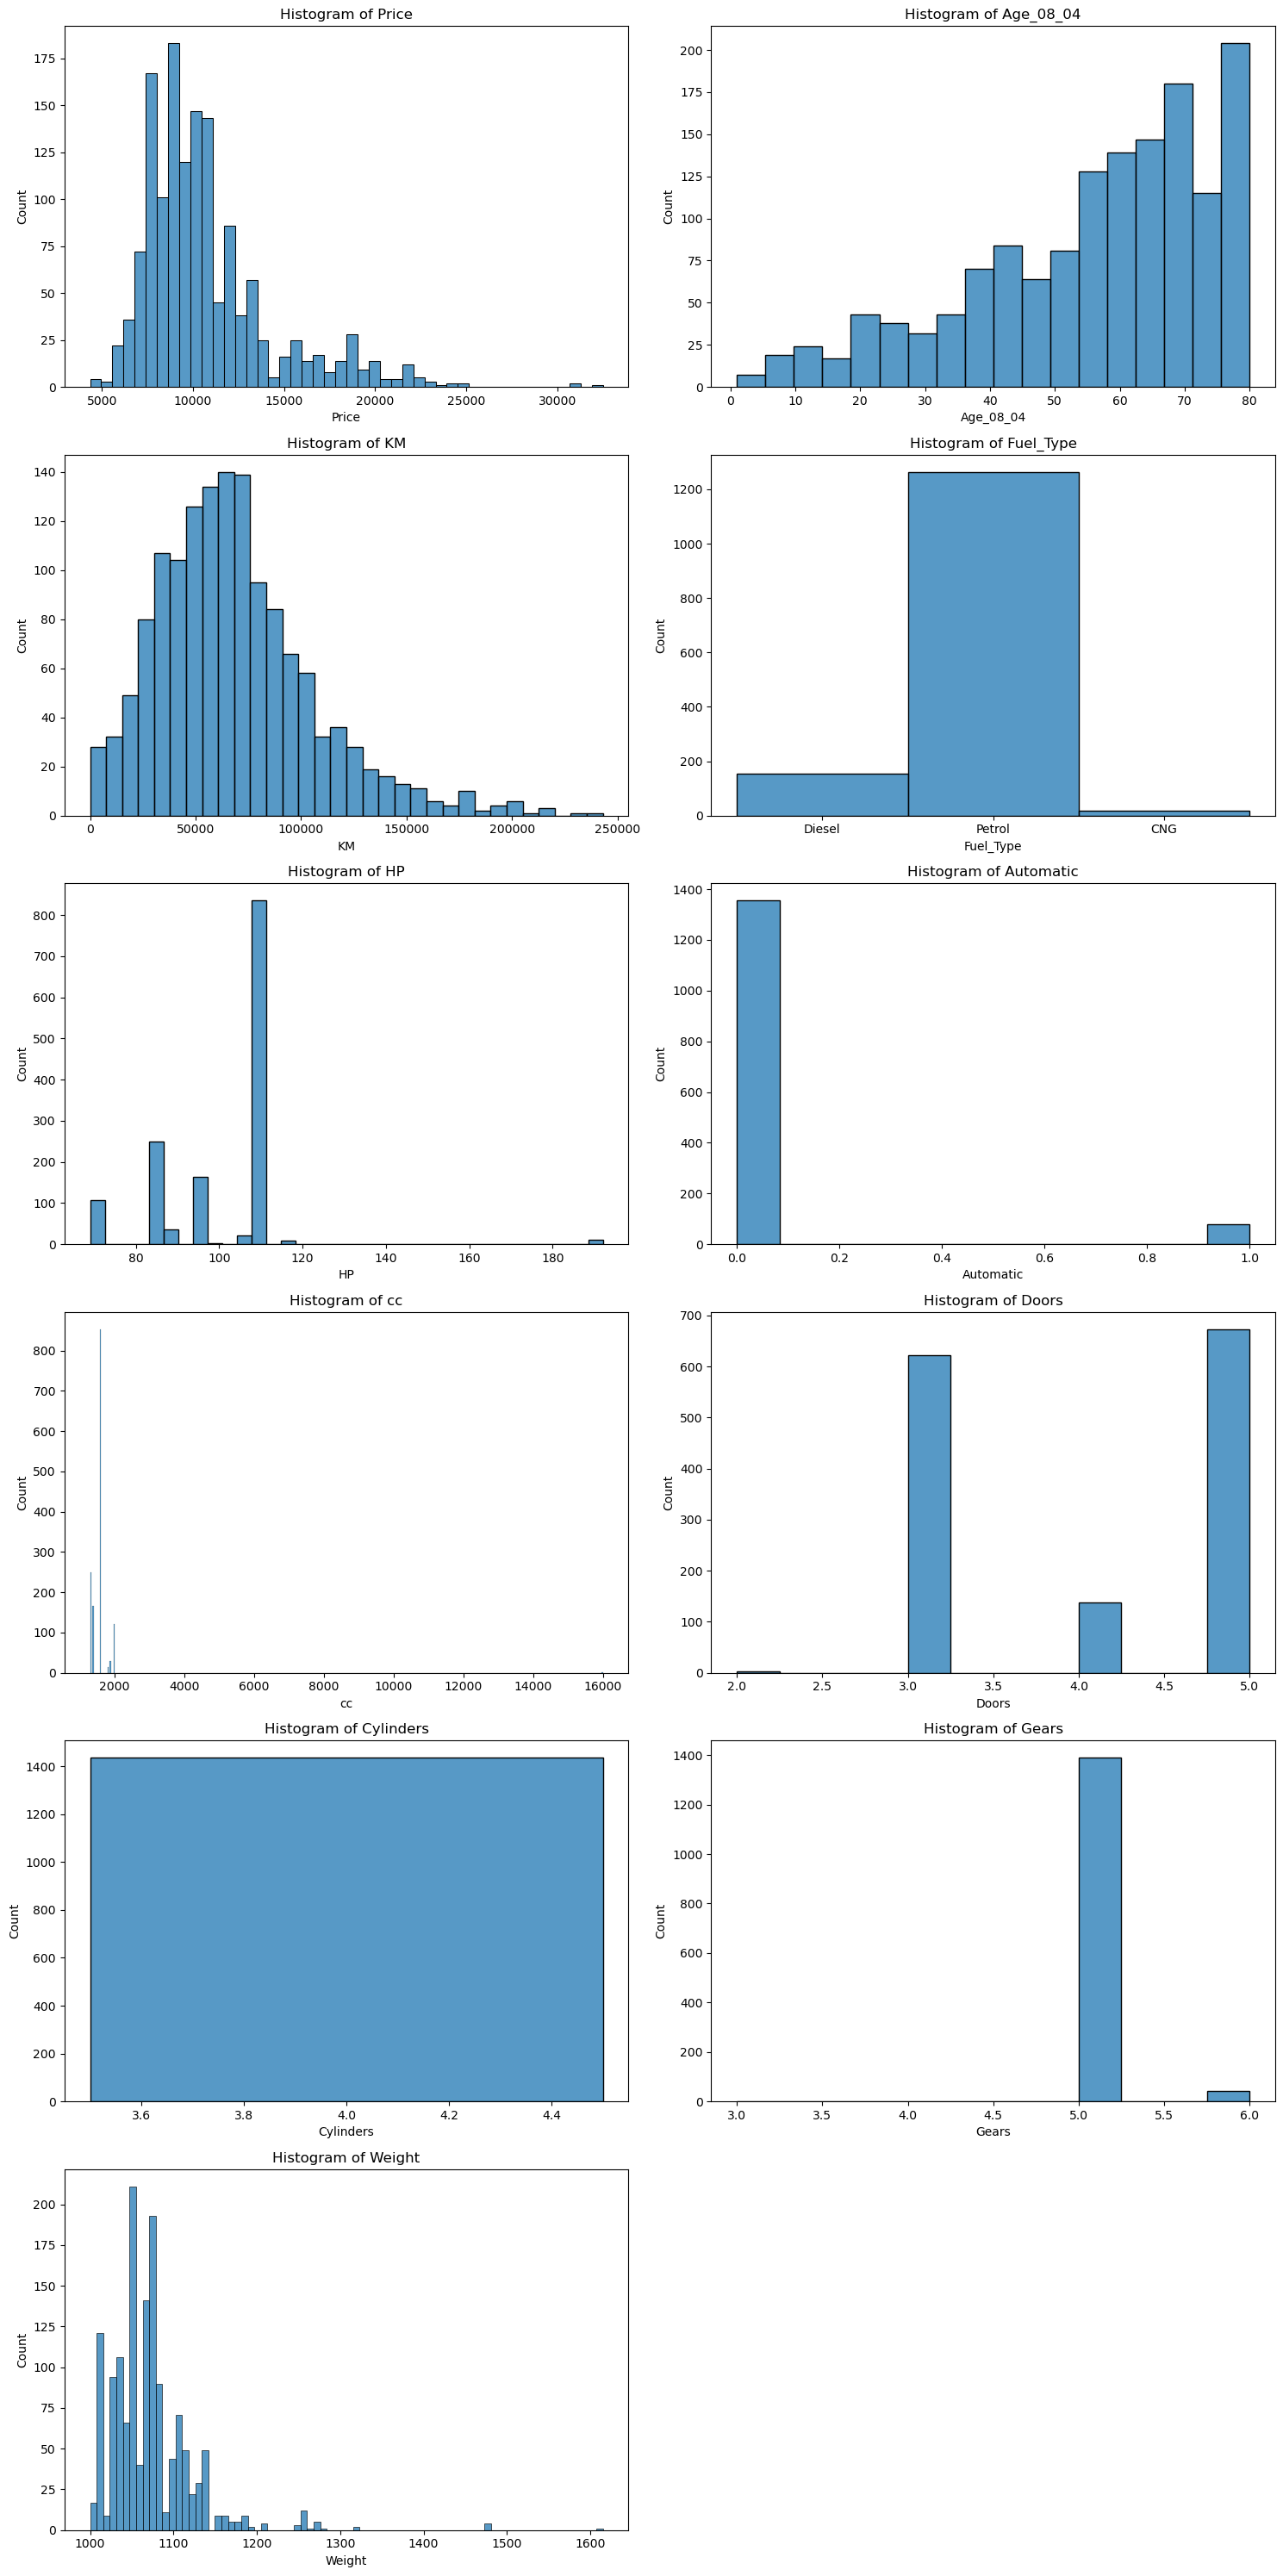

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'tc' is your DataFrame
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(tc.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(tc.columns):
    sns.histplot(data=tc, x=column, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [151]:
# Price, KM, HP, cc and Weight are right skewed and outliers are on extreme max side
# Age_08_04 is left skewed and not normal distributed it also have outliers
# Fuel_type, Automatic, Doors, Cylinders and Gears are categorical

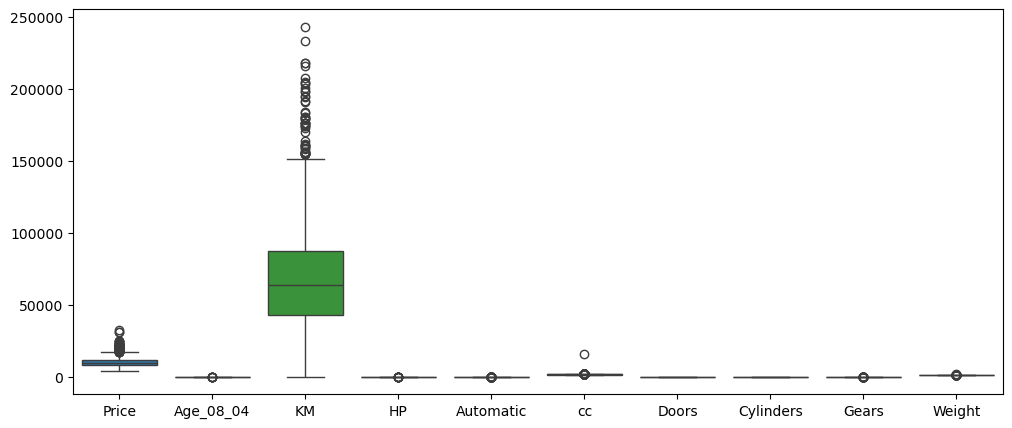

In [152]:
# boxplot
fig = plt.figure(figsize=(12,5))
sns.boxplot(data=tc)
plt.show()

In [153]:
# by viewing boxplots for all variables we can see outliers are present in Price, KM and cc. But remaining columns also ouliters are present we can
# see clearly if we plot boxplot for individual column

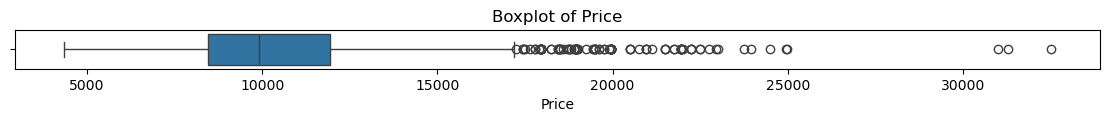

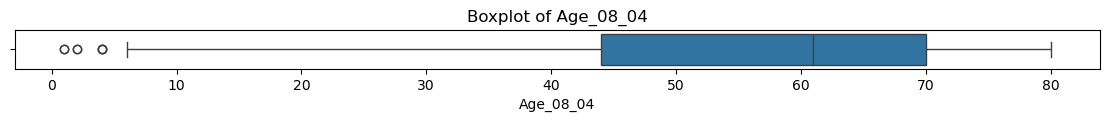

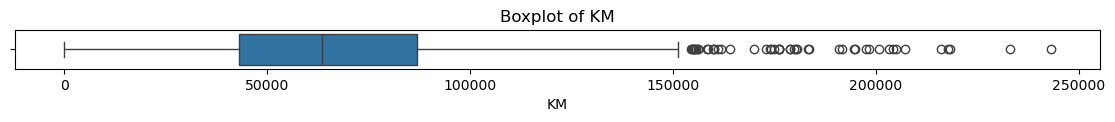

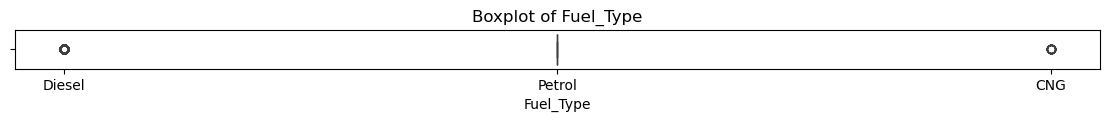

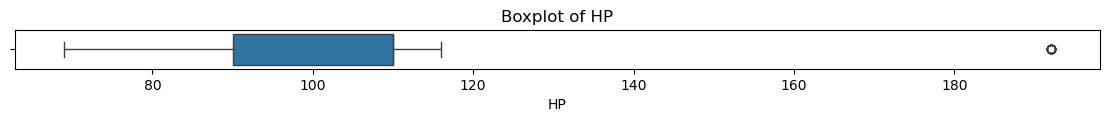

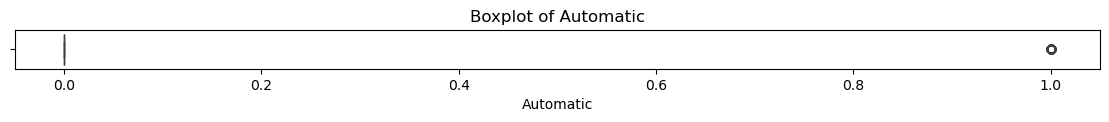

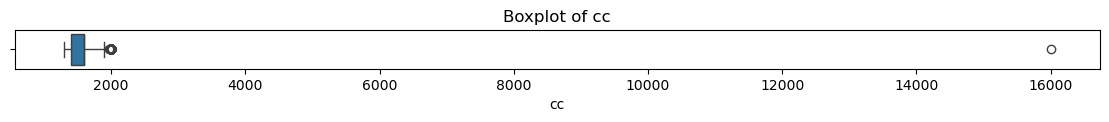

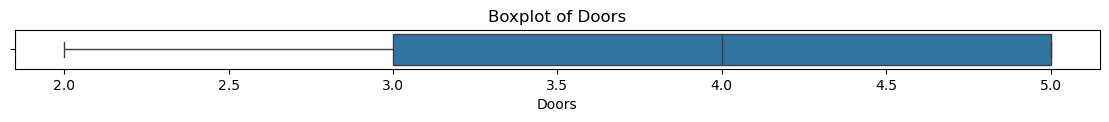

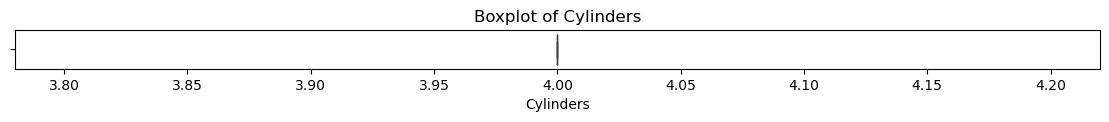

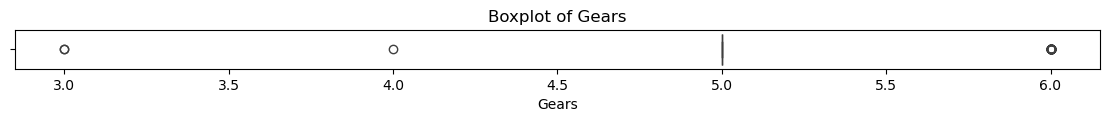

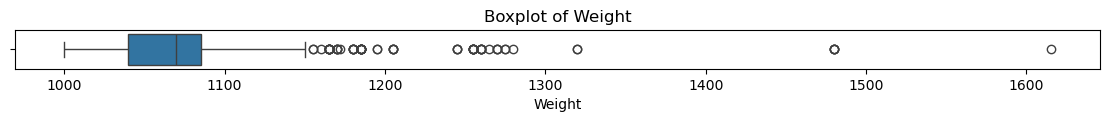

In [154]:
# boxplot separate for each column
for column in tc.columns:
    fig = plt.figure(figsize=(14, 0.5))
    sns.boxplot(data=tc, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [155]:
# outliers are present in Price, Age_08_04, KM, HP, cc and Weight. We are not handling outliers in Price since it is a target variable

In [156]:
# columns which are having outliers are identified and handling outliers in those columns by using IQR method
columns = ['Age_08_04','KM','HP','cc','Weight']
for column in columns:
        Q1 = tc[column].quantile(0.25)
        Q3 = tc[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        tc[column] = tc[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

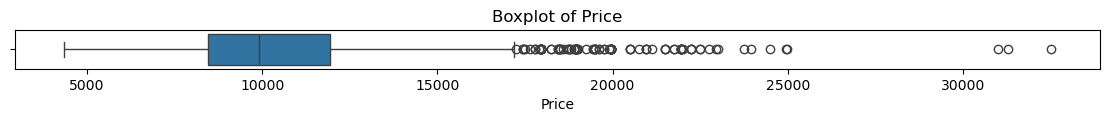

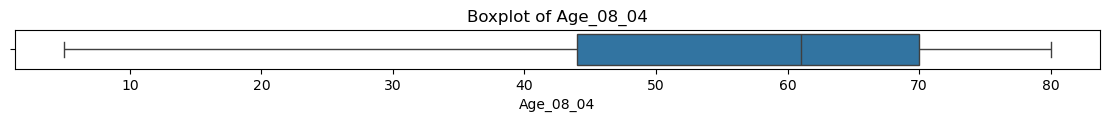

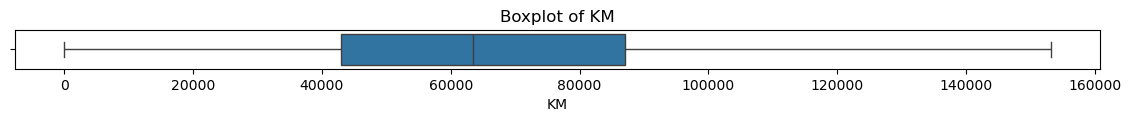

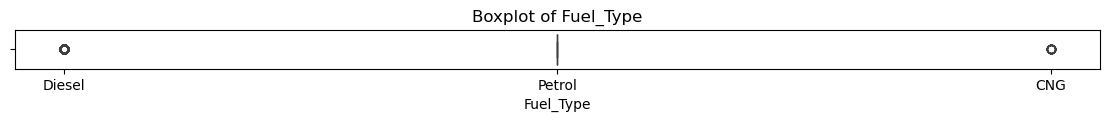

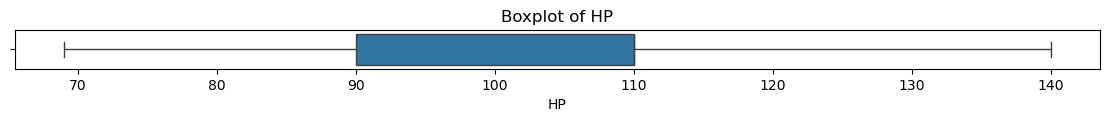

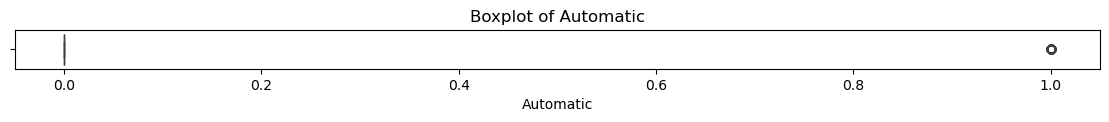

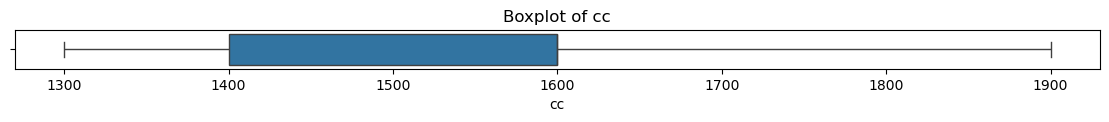

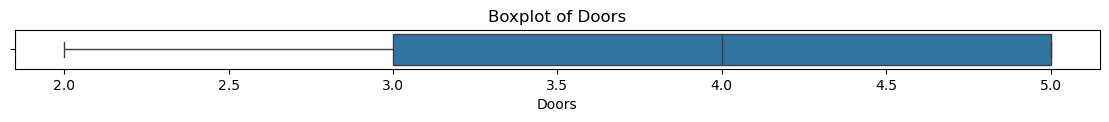

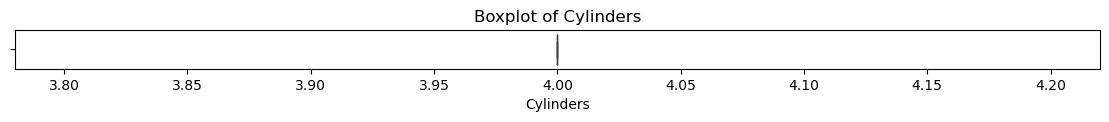

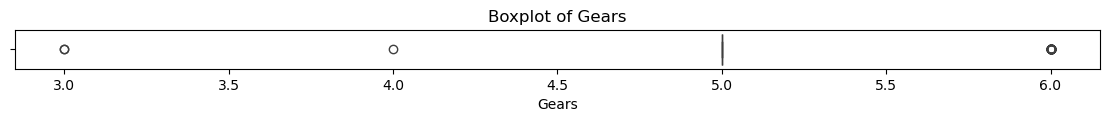

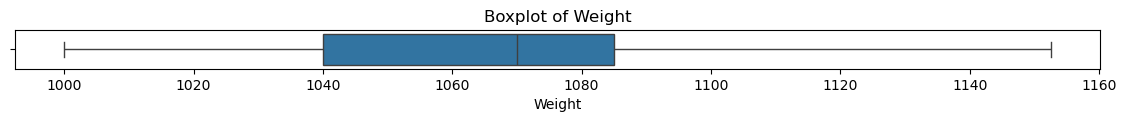

In [157]:
# checking after handling outliers
for column in tc.columns:
    fig = plt.figure(figsize=(14, 0.5))
    sns.boxplot(data=tc, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [158]:
# applying one-hot encoding. Converting categorical varibles to numerical variables.
tc = pd.get_dummies(data = tc, columns=['Fuel_Type'], drop_first=True, dtype='int64')

In [159]:
# checking data type after converting categorical to numerical variable
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1435 non-null   int64  
 1   Age_08_04         1435 non-null   float64
 2   KM                1435 non-null   float64
 3   HP                1435 non-null   float64
 4   Automatic         1435 non-null   int64  
 5   cc                1435 non-null   float64
 6   Doors             1435 non-null   int64  
 7   Cylinders         1435 non-null   int64  
 8   Gears             1435 non-null   int64  
 9   Weight            1435 non-null   float64
 10  Fuel_Type_Diesel  1435 non-null   int64  
 11  Fuel_Type_Petrol  1435 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 134.7 KB


In [160]:
# Dropping the Cylinders varible since it has only one value where standard deviation is zero so we won't get any information
corr = tc.drop(columns=['Cylinders']).corr(numeric_only=True)

In [161]:
# correlation matrix
corr

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.875937,-0.586871,0.265753,0.033928,0.168424,0.183604,0.063831,0.534909,0.046612,-0.031356
Age_08_04,-0.875937,1.000000,0.530670,-0.129602,0.031255,-0.136644,-0.146704,-0.005729,-0.476150,-0.093084,0.088216
KM,-0.586871,0.530670,1.000000,-0.329729,-0.082221,0.258680,-0.036618,0.019829,0.000977,0.376921,-0.408052
HP,0.265753,-0.129602,-0.329729,1.000000,0.022541,0.098192,0.120139,0.140777,0.024877,-0.601584,0.549942
Automatic,0.033928,0.031255,-0.082221,0.022541,1.000000,-0.059263,-0.027492,-0.098582,0.090598,-0.084248,0.079997
cc,0.168424,-0.136644,0.258680,0.098192,-0.059263,1.000000,0.138433,0.052222,0.717782,0.698106,-0.675943
Doors,0.183604,-0.146704,-0.036618,0.120139,-0.027492,0.138433,1.000000,-0.160101,0.381177,0.023538,-0.025746
Gears,0.063831,-0.005729,0.019829,0.140777,-0.098582,0.052222,-0.160101,1.000000,0.020166,-0.048706,0.063079
Weight,0.534909,-0.476150,0.000977,0.024877,0.090598,0.717782,0.381177,0.020166,1.000000,0.574681,-0.577437
Fuel_Type_Diesel,0.046612,-0.093084,0.376921,-0.601584,-0.084248,0.698106,0.023538,-0.048706,0.574681,1.000000,-0.942673


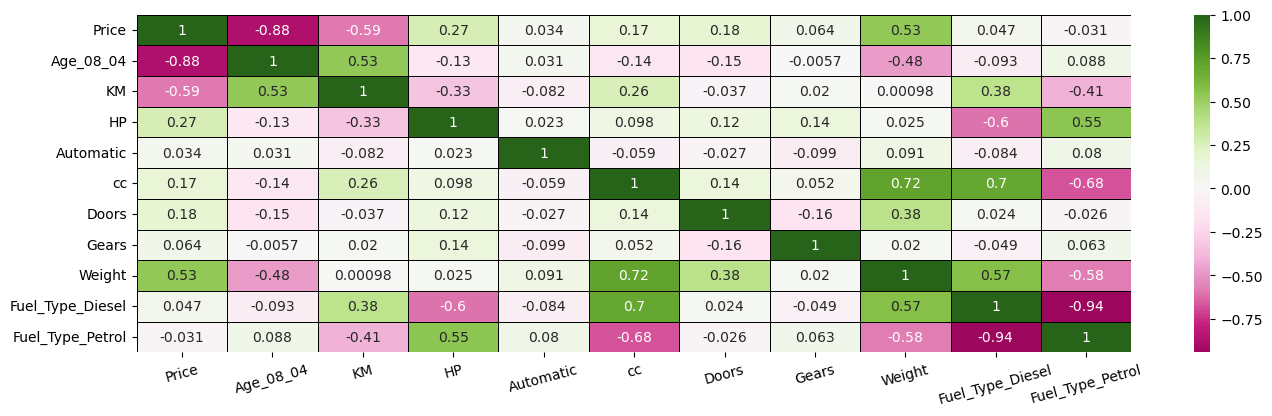

In [162]:
# correlation heatmap
fig = plt.figure(figsize=(14,5))
sns.heatmap(data=corr,cmap='PiYG',center=0,annot=True,linewidths=0.5,linecolor='black')
plt.tight_layout()
plt.xticks(rotation=15)
plt.show()

In [163]:
# price has strong negative correlation with Age_08_04. Price decreases as the age of the vehicles increase
# price has moderate negative correlation with KM. Price decrease as the vehicle KM increases
# Price has moderate positive correltion with Weight. Price increases as the Weight of the increases

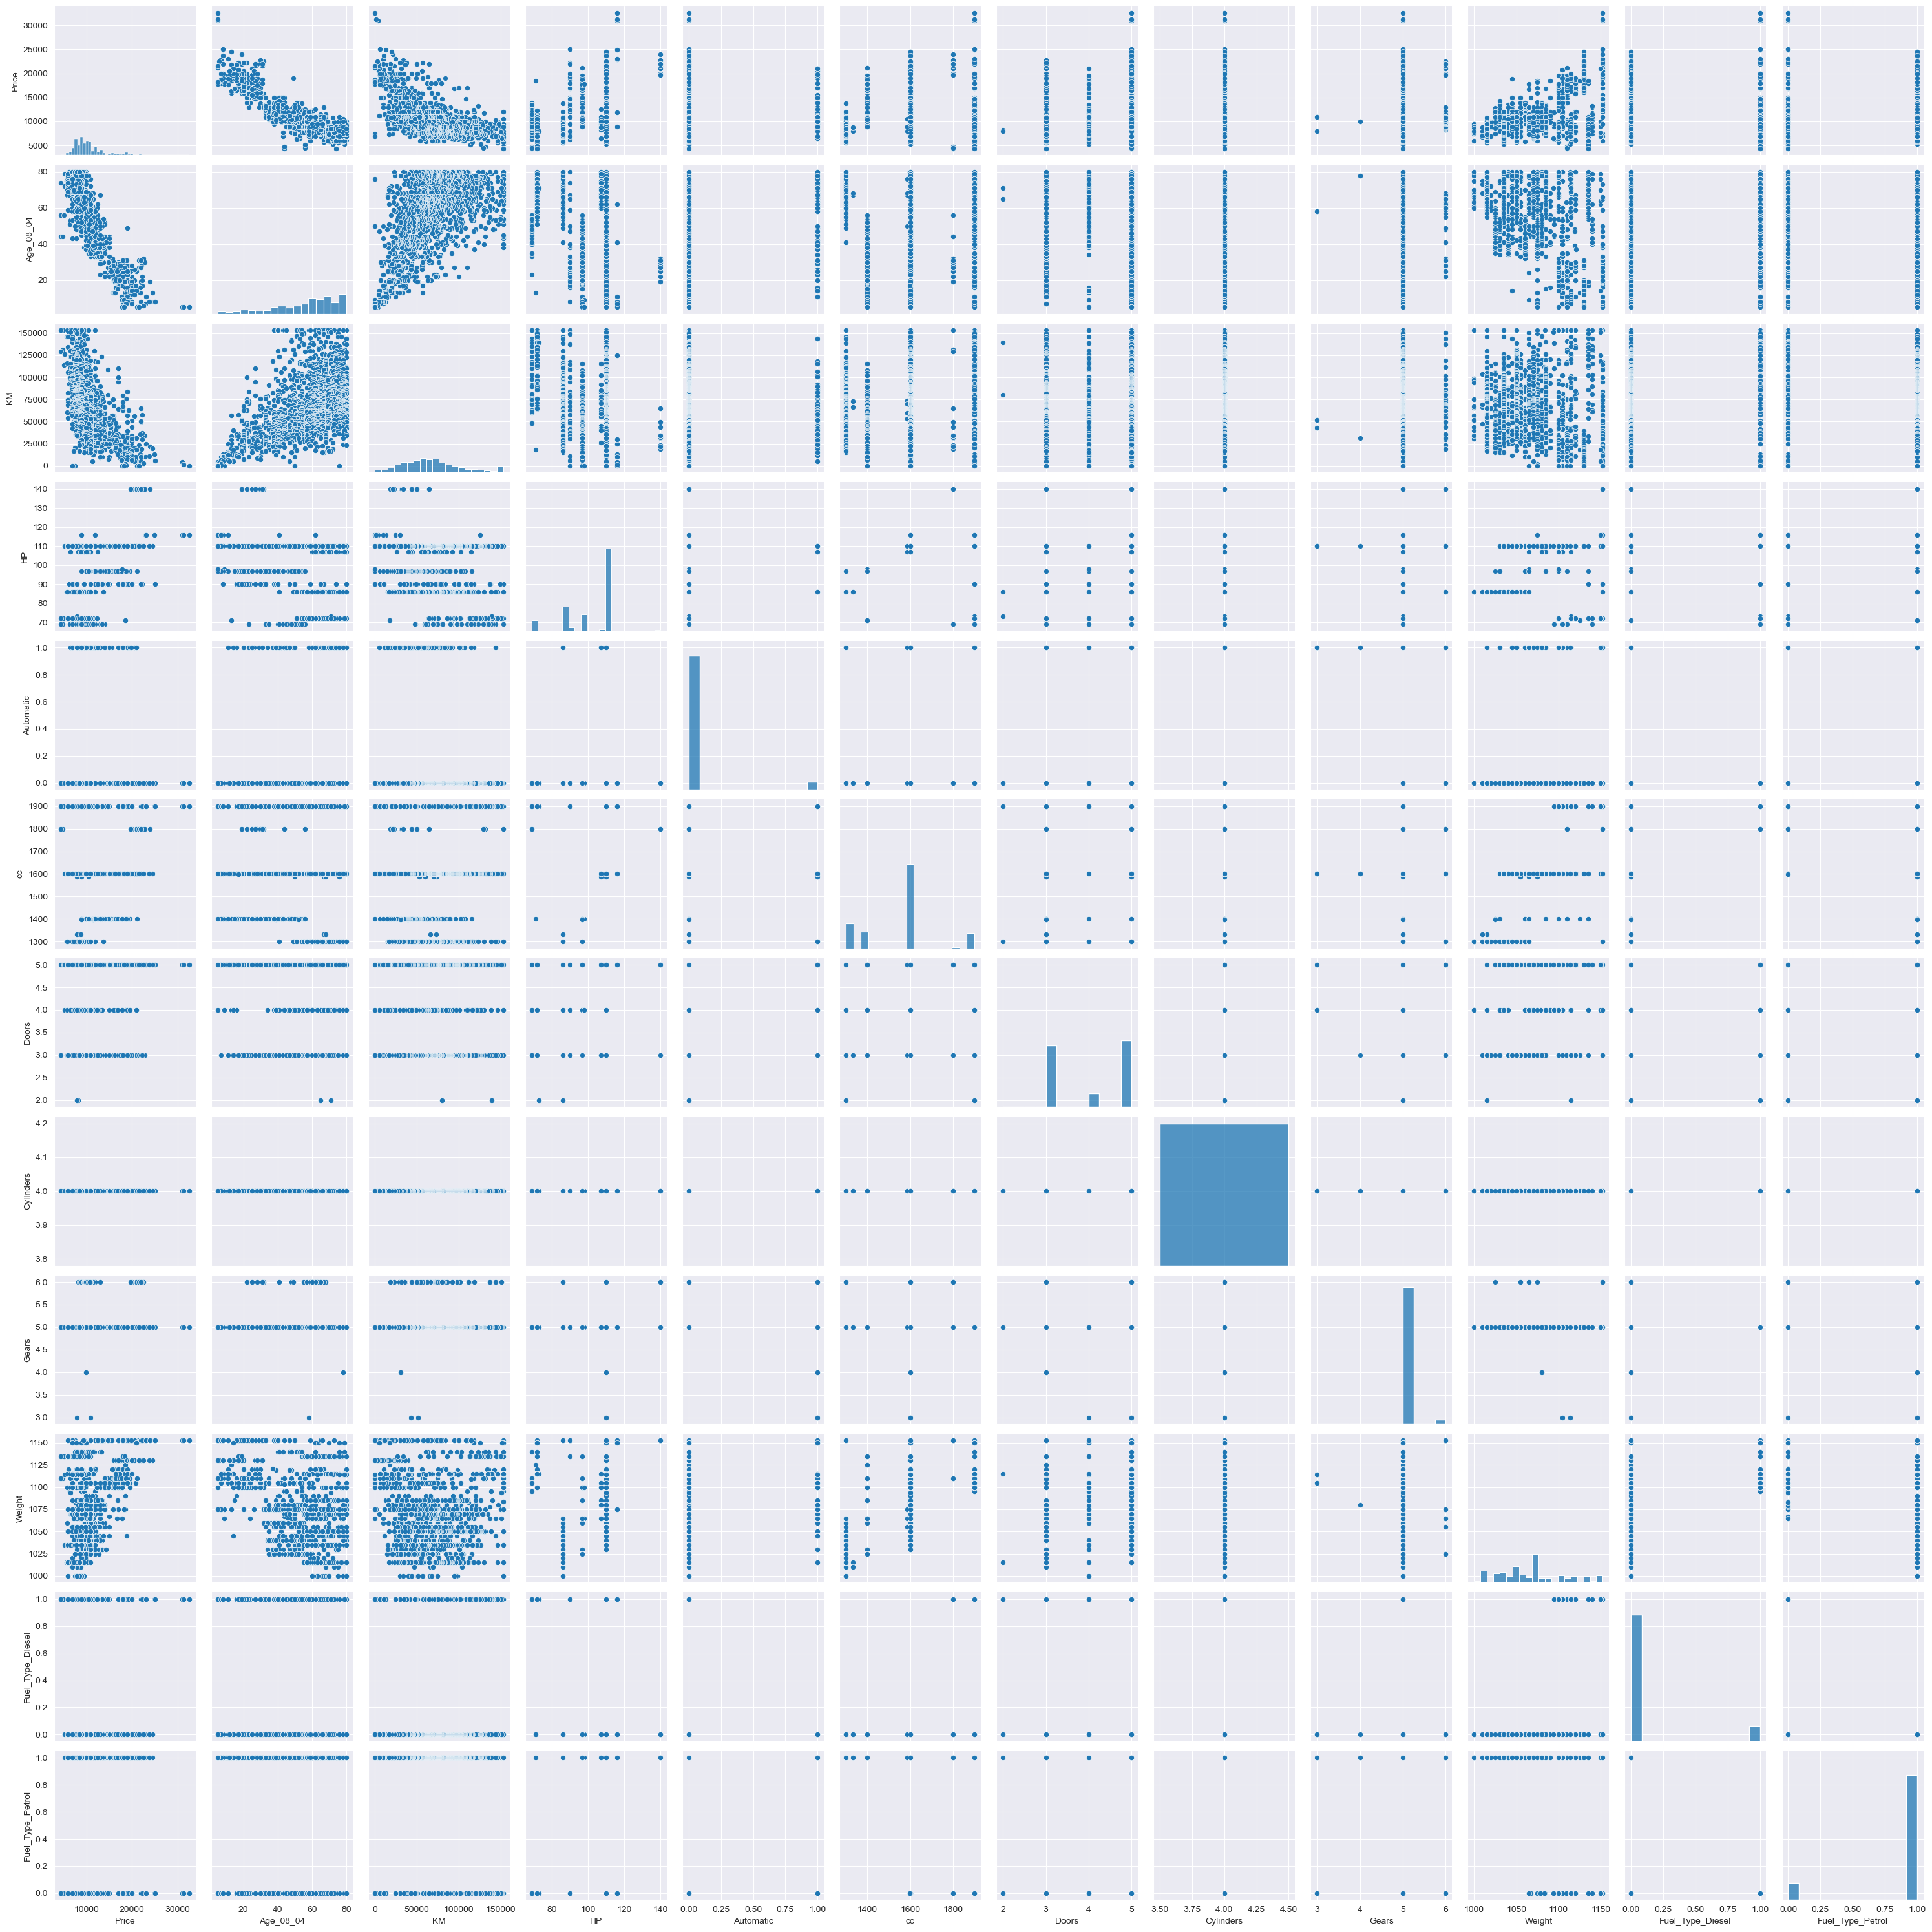

In [164]:
sns.set_style(style='darkgrid')
sns.pairplot(data=tc)
plt.tight_layout()
plt.show()

In [165]:
# splitting individual variable and target variable
X = tc.iloc[:,1:]
y = tc.iloc[:,:1]

In [166]:
X

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23.0,46986.0,90.0,0,1900.0,3,4,5,1152.5,1,0
1,23.0,72937.0,90.0,0,1900.0,3,4,5,1152.5,1,0
2,24.0,41711.0,90.0,0,1900.0,3,4,5,1152.5,1,0
3,26.0,48000.0,90.0,0,1900.0,3,4,5,1152.5,1,0
4,30.0,38500.0,90.0,0,1900.0,3,4,5,1152.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1430,69.0,20544.0,86.0,0,1300.0,3,4,5,1025.0,0,1
1431,72.0,19000.0,86.0,0,1300.0,3,4,5,1015.0,0,1
1432,71.0,17016.0,86.0,0,1300.0,3,4,5,1015.0,0,1
1433,70.0,16916.0,86.0,0,1300.0,3,4,5,1015.0,0,1


In [167]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1430,7500
1431,10845
1432,8500
1433,7250


In [168]:
# splitting the dataset for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
X_train.shape

(1148, 11)

In [170]:
y_train.shape

(1148, 1)

In [171]:
X_test.shape

(287, 11)

In [172]:
y_test.shape

(287, 1)

In [173]:
# linear regression object
linear_regression = LinearRegression()

In [174]:
# training the model
linear_regression.fit(X_train,y_train)

LinearRegression()

In [175]:
linear_regression.coef_

array([[-1.17092022e+02, -1.77133104e-02,  1.25738320e+02,
         3.88550723e+02, -9.99103340e+00, -1.06042947e+02,
         1.15960574e-11,  5.56192799e+02,  3.03140311e+01,
         6.54283593e+03,  1.15879560e+03]])

In [176]:
# testing the model
y_pred_lr = linear_regression.predict(X_test)

In [177]:
# lasso object
lasso = Lasso()

In [178]:
# model training
lasso.fit(X_train,y_train)

Lasso()

In [179]:
y_pred_lasso = lasso.predict(X_test)

In [180]:
# ridge object
ridge = Ridge()

In [181]:
ridge.fit(X_train,y_train)

Ridge()

In [182]:
y_pred_ridge = ridge.predict(X_test)

In [183]:
# Evaluate the performance of the models
def evaluate_model(y_true, y_pred, model_name):
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Performance:')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R^2 Score: {r2}')
    print('\n')

In [184]:
evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')

Linear Regression Performance:
Root Mean Squared Error: 1311.129531610174
R^2 Score: 0.8567107209640341


Lasso Regression Performance:
Root Mean Squared Error: 1316.1941651960103
R^2 Score: 0.855601586725073


Ridge Regression Performance:
Root Mean Squared Error: 1330.9602688409032
R^2 Score: 0.8523434621196041




In [185]:
# Linear Regression has highest R2 score and low RMSE value

In [186]:
# Print the coefficients of the models
print('Linear Regression Coefficients:')
print(linear_regression.coef_)
print('\n')

print('Lasso Regression Coefficients:')
print(lasso.coef_)
print('\n')

print('Ridge Regression Coefficients:')
print(ridge.coef_)
print('\n')

Linear Regression Coefficients:
[[-1.17092022e+02 -1.77133104e-02  1.25738320e+02  3.88550723e+02
  -9.99103340e+00 -1.06042947e+02  1.15960574e-11  5.56192799e+02
   3.03140311e+01  6.54283593e+03  1.15879560e+03]]


Lasso Regression Coefficients:
[-1.17117034e+02 -1.79082939e-02  1.22406638e+02  3.58414379e+02
 -9.71593771e+00 -1.07365010e+02  0.00000000e+00  5.20738599e+02
  3.03738316e+01  6.16261032e+03  9.74107944e+02]


Ridge Regression Coefficients:
[[-1.17590939e+02 -1.81979000e-02  1.11215102e+02  3.47109608e+02
  -8.79276793e+00 -1.12158750e+02  0.00000000e+00  5.38094533e+02
   3.05618949e+01  5.21231789e+03  6.93884655e+02]]




In [187]:
import pandas as pd

# Example assuming X is feature matrix and linear_regression, lasso, ridge are fitted models
# Ensure coefficients are 1-dimensional
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': linear_regression.coef_.reshape(-1),  # Ensure it's 1-dimensional
    'Lasso Regression': lasso.coef_.reshape(-1),  # Ensure it's 1-dimensional
    'Ridge Regression': ridge.coef_.reshape(-1)  # Ensure it's 1-dimensional
})

print(coefficients)


             Feature  Linear Regression  Lasso Regression  Ridge Regression
0          Age_08_04      -1.170920e+02       -117.117034       -117.590939
1                 KM      -1.771331e-02         -0.017908         -0.018198
2                 HP       1.257383e+02        122.406638        111.215102
3          Automatic       3.885507e+02        358.414379        347.109608
4                 cc      -9.991033e+00         -9.715938         -8.792768
5              Doors      -1.060429e+02       -107.365010       -112.158750
6          Cylinders       1.159606e-11          0.000000          0.000000
7              Gears       5.561928e+02        520.738599        538.094533
8             Weight       3.031403e+01         30.373832         30.561895
9   Fuel_Type_Diesel       6.542836e+03       6162.610322       5212.317886
10  Fuel_Type_Petrol       1.158796e+03        974.107944        693.884655
